<a href="https://colab.research.google.com/github/pizzapuppies/Usif_FYP_code/blob/main/raw_data(complex)%20with%20k-fold%20cross%20validation%20CNN_for_dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

predictive ANN for solution


In [35]:
! pip install impedance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
from google.colab import drive
import pandas as pd 
import os
import tensorflow as tf
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv
import random

import sys
from impedance.models.circuits import Randles

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
mat = [[1,2,3],[4,5,6]]

def split23(li):
  g = []
  for i in range(1,len(li),3):
    g.append(li[i:i+3])
  return g

In [38]:
X = []

with open('/content/gdrive/My Drive/FYP Dengue data - Sheet1.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  line_count = 0
    
  for i in csv_reader:
    if line_count == 0:
      for j in range(len(split23(i))):
        X.append([])
      
    line_count += 1
    if i[0] in ["index","conc","label"]:
            if i[0] == "label":
              y = split23(i)
    else:
      li = split23(i)
      
      for ind,dat in enumerate(li):
        com = list(map(float,dat[1:]))
        X[ind].append(complex(com[0],com[1]))
        



for i,li in enumerate(y):
  if li[0] == "1":
    y[i] = 1
  else:
    y[i] = 0

X = np.array(X)
y = np.array(y)

temp = list(zip(X, y))
random.shuffle(temp)
X, y = zip(*temp)
X, y = list(X), list(y)
X = np.array(X).astype('complex')
y = np.array(y)

impedance py did the math but did not output the parameters

In [39]:
from sklearn.model_selection import KFold

n_split=3

for train_index,test_index in KFold(n_split).split(X):
  x_train,x_test=X[train_index],X[test_index]
  y_train,y_test=y[train_index],y[test_index]

In [40]:
"""#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X,y, test_size=0.10)

X_train = np.asarray(X_train).astype('complex')
X_test = np.asarray(X_test).astype('complex')
Y_train = np.asarray(Y_train).astype('float32').reshape((-1,1))
Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
print(X_train[0])
print(Y_train[0])

print("\nTrain Test Dimensions:\n------------------------------------")
print("shape of training set",X_train.shape, Y_train.shape)
print("shape of testing set",X_test.shape, Y_test.shape)"""

'#Split training and test data\nX_train,X_test,Y_train,Y_test = train_test_split( X,y, test_size=0.10)\n\nX_train = np.asarray(X_train).astype(\'complex\')\nX_test = np.asarray(X_test).astype(\'complex\')\nY_train = np.asarray(Y_train).astype(\'float32\').reshape((-1,1))\nY_test = np.asarray(Y_test).astype(\'float32\').reshape((-1,1))\nprint(X_train[0])\nprint(Y_train[0])\n\nprint("\nTrain Test Dimensions:\n------------------------------------")\nprint("shape of training set",X_train.shape, Y_train.shape)\nprint("shape of testing set",X_test.shape, Y_test.shape)'

In [41]:
from tensorflow import keras



In [42]:
#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

In [43]:
#Add the first hidden layer
model.add(keras.layers.Dense(128,         #Number of nodes
                        input_shape=(50,1), #Number of input variables
                        name='Hidden-Layer-1', #Logical name
                        activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(tf.keras.layers.Conv1D(
    2,3,activation='relu'
))
model.add(tf.keras.layers.Flatten())

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-3',
                              activation='relu'))



#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-4',
                              activation='relu'))




In [44]:
model.add(keras.layers.Dense(1,
                             name='Output-Layer',
                             activation='sigmoid'))

#model.summary()

In [45]:
#Compile the model with loss & metrics
model.compile(loss= tf.keras.losses.BinaryCrossentropy() ,
              metrics=['accuracy'])

In [46]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=10
#Set number of epochs
EPOCHS=20
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")
#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)


Training Progress:
------------------------------------
Epoch 1/20
10/10 [==============================] - 1s 35ms/step - loss: 28.9122 - accuracy: 0.5400 - val_loss: 0.6960 - val_accuracy: 0.3846
Epoch 2/20
10/10 [==============================] - 0s 13ms/step - loss: 0.6956 - accuracy: 0.5000 - val_loss: 0.6965 - val_accuracy: 0.3846
Epoch 3/20
10/10 [==============================] - 0s 11ms/step - loss: 0.6873 - accuracy: 0.5100 - val_loss: 0.6962 - val_accuracy: 0.3846
Epoch 4/20
10/10 [==============================] - 0s 12ms/step - loss: 0.6868 - accuracy: 0.5100 - val_loss: 0.6962 - val_accuracy: 0.3846
Epoch 5/20
10/10 [==============================] - 0s 11ms/step - loss: 0.6869 - accuracy: 0.5100 - val_loss: 0.6959 - val_accuracy: 0.3846
Epoch 6/20
10/10 [==============================] - 0s 10ms/step - loss: 0.6867 - accuracy: 0.5100 - val_loss: 0.6962 - val_accuracy: 0.3846
Epoch 7/20
10/10 [==============================] - 0s 11ms/step - loss: 0.6869 - accuracy: 0.51

In [47]:
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
z = model.evaluate(X_test,Y_test)
print("The accuracy of the model is ",round(z[1]*100)," %")


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 30ms/step - loss: 0.6908 - accuracy: 0.6429
The accuracy of the model is  64  %



Accuracy during Training :
------------------------------------


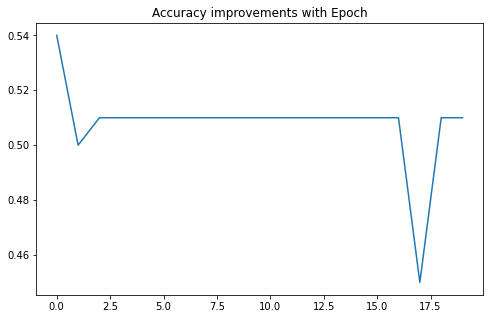

In [48]:
print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()